# Pymaceuticals Inc.
---

### Analysis

- There is a strong correlation between the mass of the mouse and the mass of the tumor of the mice treated by Capomulin.
- Capomulin asppears to be affective in reducing the overall tumor volume over time.
- Mice treated with Capomulin had the lowest final tumor size compared to the other drugs Infubinol, and Ceftamin. Tumor sizes were comparable to mice treated with Ramicane.
 

In [370]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")


# Display the data table for preview
mouse_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [371]:
# Checking the number of mice.
mouse_count = len(mouse_study_df["Mouse ID"].unique())
mouse_count

249

In [372]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_study_df[mouse_study_df[['Mouse ID', 'Timepoint']].duplicated() == True]['Mouse ID'].unique()
duplicate_mouse


array(['g989'], dtype=object)

In [373]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989", :]
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [374]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_study_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] != "g989"]

cleaned_mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [375]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = len(cleaned_mouse_study_df["Mouse ID"].unique())
cleaned_mouse_count

248

## Summary Statistics

In [376]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_mean = cleaned_mouse_study_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

drug_median = cleaned_mouse_study_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

drug_variance = cleaned_mouse_study_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

drug_stddev = cleaned_mouse_study_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

drug_stderr = cleaned_mouse_study_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stats_df = pd.DataFrame({"Mean Tumer Volume": drug_mean, "Median Tumer Volume": drug_median,
                                 "Tumor Volume Variance": drug_variance, "Tumoer Volume Std. Dev.": drug_stddev,
                                 "Tumor Volume Std. Err.": drug_stderr})
summary_stats_df

,Mean Tumer Volume,Median Tumer Volume,Tumor Volume Variance,Tumoer Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [377]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_agg_df = cleaned_mouse_study_df.groupby("Drug Regimen").agg(["mean", "median", "var",
                                                                            "std", "sem"])["Tumor Volume (mm3)"]
summary_stats_agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

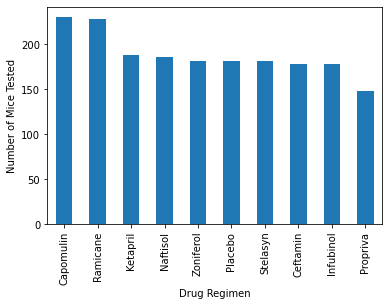

In [378]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_count_by_regimen = cleaned_mouse_study_df['Drug Regimen'].value_counts()

mouse_count_chart = mouse_count_by_regimen.plot(kind="bar")
mouse_count_chart.set_xlabel('Drug Regimen')
mouse_count_chart.set_ylabel('Number of Mice Tested')
plt.show()

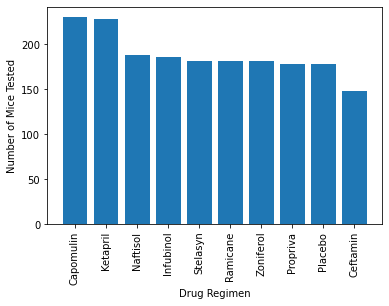

In [379]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = cleaned_mouse_study_df["Drug Regimen"].unique()
tick_locations = [value for value in x_axis]
timepoint = cleaned_mouse_study_df["Drug Regimen"].value_counts()

plt.bar(x_axis, timepoint, align="center")
plt.xticks(tick_locations, x_axis, rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()


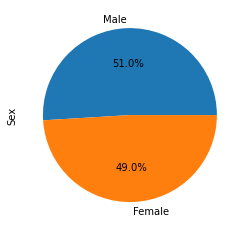

In [380]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

male_vs_female = cleaned_mouse_study_df['Sex'].value_counts()

male_vs_female.plot(kind="pie", autopct="%1.1f%%")
plt.show()

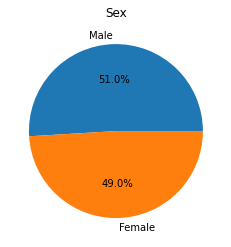

In [381]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_vs_female = cleaned_mouse_study_df['Sex'].value_counts()
pie_labels = male_vs_female.index

plt.pie(male_vs_female, labels=pie_labels, autopct="%1.1f%%")
plt.title("Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [398]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume_df = pd.DataFrame({"Timepoint": cleaned_mouse_study_df.groupby(["Mouse ID"]).max()["Timepoint"]})
final_tumor_volume_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse_study_df = pd.merge(cleaned_mouse_study_df, final_tumor_volume_df, on=("Mouse ID", "Timepoint"), how="right")
merged_mouse_study_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [397]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
num_treatments = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    cur_drug = merged_mouse_study_df.loc[merged_mouse_study_df["Drug Regimen"] == treatment]
    tumor_vol_list.append(cur_drug["Tumor Volume (mm3)"])

    # add subset 
    quartiles = tumor_vol_list[num_treatments].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol_list[num_treatments].loc[(tumor_vol_list[num_treatments] > upper_bound) | (tumor_vol_list[num_treatments] < lower_bound)]
    
    print(treatment + "'s potential outliers: " + str(outliers))
    num_treatments += 1


    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


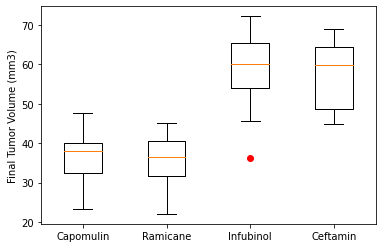

In [384]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, box1 = plt.subplots()
box1.set_ylabel("Final Tumor Volume (mm3)")
box1.set_xticklabels(treatment_list)
box1.boxplot(tumor_vol_list, 0, 'ro')
plt.show()


## Line and Scatter Plots

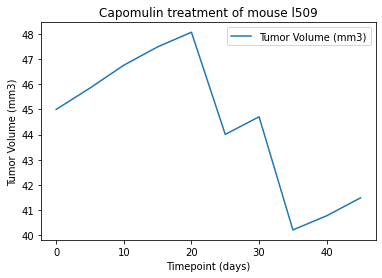

In [385]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse_df = cleaned_mouse_study_df.loc[cleaned_mouse_study_df["Drug Regimen"] == 'Capomulin']

one_capo_mouse_df = cleaned_mouse_study_df.loc[cleaned_mouse_study_df["Mouse ID"] == 'l509']

mouse_line_chart = one_capo_mouse_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
mouse_line_chart.set_title("Capomulin treatment of mouse l509")
mouse_line_chart.set_xlabel("Timepoint (days)")
mouse_line_chart.set_ylabel("Tumor Volume (mm3)")
plt.show()



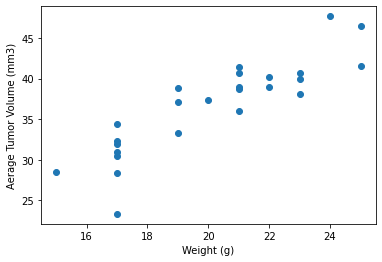

In [388]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
final_mouse_capomulin_df = pd.DataFrame(merged_mouse_study_df.loc[merged_mouse_study_df["Drug Regimen"] == "Capomulin"])

x_values = final_mouse_capomulin_df["Weight (g)"]
y_values = final_mouse_capomulin_df['Tumor Volume (mm3)']
y_values

plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Aerage Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.77


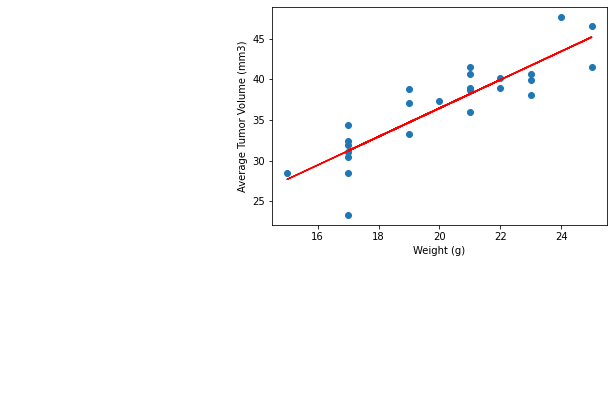

In [389]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print("The correlation between mouse weight and the average tumor volume is " + str(round(rvalue**2, 2)))
plt.show()